In [1]:
import numpy as np
import cv2
import os

In [2]:
path='.\dataset\images'
images = os.listdir(path)

In [3]:
images_array = []
for i in images:
    image = os.path.join(path, i)
    image = cv2.imread(image)
    image = cv2.resize(image, (64, 64))
    images_array.append(image)

len(images_array)

8189

In [4]:
images_array = np.asarray(images_array)

In [5]:
images_array.shape

(8189, 64, 64, 3)

# Generative Adversarial Model

In [6]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import *
from keras.models import *
from keras.datasets import mnist
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [7]:
#Hyperparameters and statistics
batch_size = 64
iterations = 3000 # Default 30000

d_loss = []
g_loss = []

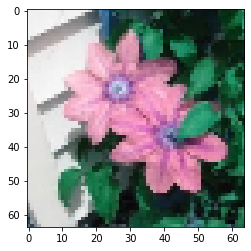

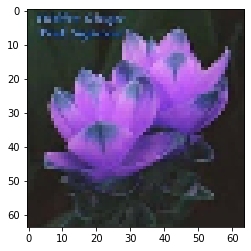

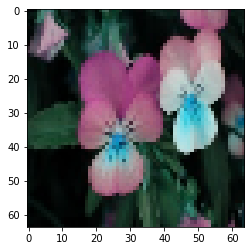

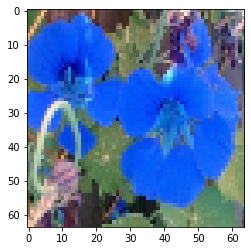

In [8]:
#Import data
x_train = images_array

#Normalize data
x_train = x_train.astype('float32') / 255.0

## Randomly generating array for displaying random image array([167, 362, 394,  70])
image_indices = np.random.randint(0, x_train.shape[0] - 1, [4])
real_images = x_train[image_indices]

for i in range(4):
    plt.figure(i)
    plt.imshow(real_images[i])

plt.show()

## Create Generator

In [9]:
#Latent input
latent_input = Input([64])

#Reshape to 4x4x64
x = Dense(4*4*64, activation = 'relu')(latent_input)
x = Reshape([4, 4, 64])(x)

#Size: 4x4x64
x = UpSampling2D()(x)
x = Conv2D(64, 3, padding = 'same', activation = 'relu')(x)

#Size: 8x8x64
x = UpSampling2D()(x)
x = Conv2D(32, 3, padding = 'same', activation = 'relu')(x)

#Size: 16x16x32
x = UpSampling2D()(x)
x = Conv2D(16, 3, padding = 'same', activation = 'relu')(x)

#Size: 32x32x16
x = UpSampling2D()(x)
x = Conv2D(8, 3, padding = 'same', activation = 'relu')(x)

#Size: 64x64x8, make RGB with values between 0 and 1
image_output = Conv2D(3, 1, padding = 'same', activation = 'sigmoid')(x)

#Make Model
generator = Model(inputs = latent_input, outputs = image_output)

#Model Summary
generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              66560     
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        1846

## Creating Discriminator

In [10]:

#Image input
image_input = Input([64, 64, 3])

#Size: 64x64x3
x = Conv2D(8, 3, padding = 'same')(image_input)
x = LeakyReLU(0.2)(x)
x = AveragePooling2D()(x)

#Size: 32x32x8
x = Conv2D(16, 3, padding = 'same')(x)
x = LeakyReLU(0.2)(x)
x = AveragePooling2D()(x)

#Size: 16x16x16
x = Conv2D(32, 3, padding = 'same')(x)
x = LeakyReLU(0.2)(x)
x = AveragePooling2D()(x)

#Size: 8x8x32
x = Conv2D(64, 3, padding = 'same')(x)
x = LeakyReLU(0.2)(x)
x = AveragePooling2D()(x)

#Size: 4x4x64
x = Conv2D(64, 3, padding = 'same')(x)
x = LeakyReLU(0.2)(x)
x = Flatten()(x)

#1-dimensional Neural Network
class_output = Dense(1)(x)

#Make Model
discriminator = Model(inputs = image_input, outputs = class_output)

#Model summary
discriminator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 8)         0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 16)        0   

## Training Discriminator

In [20]:
#Build network to train the discriminator.
#Discriminator will train, but Generator won't train.
for layer in discriminator.layers:
    layer.trainable = True
    
for layer in generator.layers:
    layer.trainable = False
    
    
    
#Get real image
real_image = Input([64, 64, 3])

#Discriminator classifies
validity_real = discriminator(real_image)



#Get latent input
latent_input = Input([64])

#Generate an image
fake_image = generator(latent_input)

#Discriminator classifies
validity_fake = discriminator(fake_image)

#Create and compile the model
DiscriminatorModel = Model(inputs = [real_image, latent_input], outputs = [validity_real, validity_fake])

DiscriminatorModel.compile(optimizer = RMSprop(lr = 0.0002), loss = ['mean_squared_error', 'mean_squared_error'])

In [21]:
fake_image

<tf.Tensor 'model_1_1/conv2d_5/Sigmoid:0' shape=(None, 64, 64, 3) dtype=float32>

In [22]:
DiscriminatorModel.output[0]

<tf.Tensor 'model_2_2/dense_2/BiasAdd:0' shape=(None, 1) dtype=float32>

In [23]:
DiscriminatorModel.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 64, 64, 3)    127763      input_6[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            62481       input_5[0][0]                    
                                                                 model_1[2][0]              

In [24]:
#Build network to train the generator.
#Discriminator won't train, but Generator will train.
for layer in discriminator.layers:
    layer.trainable = False
    
for layer in generator.layers:
    layer.trainable = True

#Get latent input
latent_input = Input([64])

#Generate an image
fake_image = generator(latent_input)

#Discriminator classifies
validity = discriminator(fake_image)

#Create and compile the model
GeneratorModel = Model(inputs = latent_input, outputs = validity)

GeneratorModel.compile(optimizer = RMSprop(lr = 0.0002), loss = 'mean_squared_error')

In [25]:
GeneratorModel.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64)                0         
_________________________________________________________________
model_1 (Model)              (None, 64, 64, 3)         127763    
_________________________________________________________________
model_2 (Model)              (None, 1)                 62481     
Total params: 190,244
Trainable params: 127,763
Non-trainable params: 62,481
_________________________________________________________________


## Training the network

In [27]:
#Train the models in a loop
for i in range(iterations):
    
    print('\rIteration ' + str(i), end = '')
    
    #Get labels
    real_labels = np.ones([batch_size, 1])
    fake_labels = np.zeros([batch_size, 1])
    
    #Train discriminator
    #Get images and latent vectors
    image_indices = np.random.randint(0, x_train.shape[0] - 1, [batch_size])
    real_images = x_train[image_indices]
    latent_vectors = np.random.normal(0.0, 1.0, [batch_size, 64])
    
    #Train
    loss = DiscriminatorModel.train_on_batch([real_images, latent_vectors], [real_labels, fake_labels])
    d_loss.append(loss[1]/2 + loss[2]/2)
    
    if(i % 200 == 0):
        print('\n Discriminator Loss: {}'.format(loss))
    
    #Train generator
    #Get latent vectors
    latent_vectors = np.random.normal(0.0, 1.0, [batch_size, 64])
    
    #Train using opposite labels
    loss = GeneratorModel.train_on_batch(latent_vectors, real_labels)
    g_loss.append(loss)
    if(i % 200 == 0):
        print('GeneratorModel Loss: {}'.format(loss))

Iteration 0
 Discriminator Loss: [0.6560699, 0.50577486, 0.075147524]
GeneratorModel Loss: 0.37956613302230835
Iteration 200
 Discriminator Loss: [0.5236946, 0.2104111, 0.31328347]
GeneratorModel Loss: 0.38419240713119507
Iteration 400
 Discriminator Loss: [0.3434481, 0.18287951, 0.1605686]
GeneratorModel Loss: 0.44790735840797424
Iteration 600
 Discriminator Loss: [0.45609355, 0.3459158, 0.110177755]
GeneratorModel Loss: 0.31002146005630493
Iteration 800
 Discriminator Loss: [0.6486098, 0.32786357, 0.32074624]
GeneratorModel Loss: 0.18149195611476898
Iteration 1000
 Discriminator Loss: [0.458707, 0.15825942, 0.30044758]
GeneratorModel Loss: 0.2830466628074646
Iteration 1200
 Discriminator Loss: [0.42835373, 0.27893868, 0.14941505]
GeneratorModel Loss: 0.28944677114486694
Iteration 1400
 Discriminator Loss: [0.4801472, 0.3497182, 0.130429]
GeneratorModel Loss: 0.25103312730789185
Iteration 1600
 Discriminator Loss: [0.46824804, 0.28890708, 0.17934096]
GeneratorModel Loss: 0.24437668919

In [35]:
print('Final Loss \nD_Loss: {} \nG_Loss: {}'.format(d_loss[ len(d_loss) - 1 ], g_loss[ len(g_loss) - 1 ]))

Final Loss 
D_Loss: 0.257792703807354 
G_Loss: 0.29545897245407104


## Prediction part

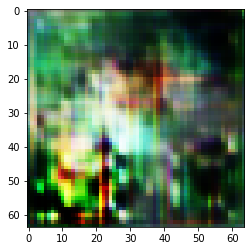

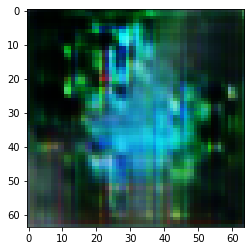

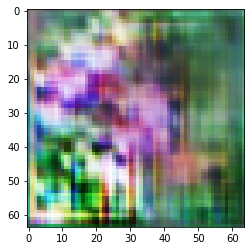

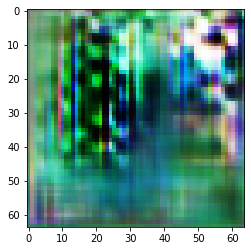

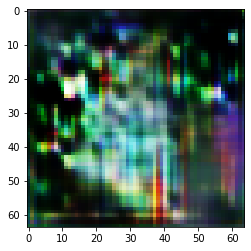

In [36]:
#Show samples
latent_vectors = np.random.normal(0.0, 1.0, [16, 64])
fake_images = generator.predict(latent_vectors)

for i in range(5):
    plt.figure(i)
    plt.imshow(fake_images[i])

plt.show()

## Saving and loading model

In [46]:
save_path = './dataset/3000_train_step_{}.h5'
generator.save(save_path.format('generator'))
discriminator.save(save_path.format('discriminator'))

In [40]:
load_generator = load_model(save_path)

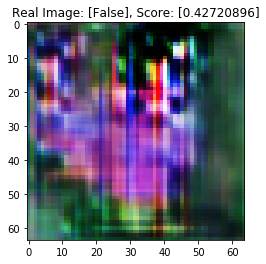

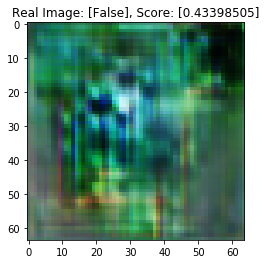

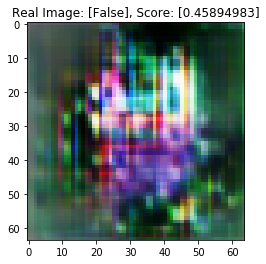

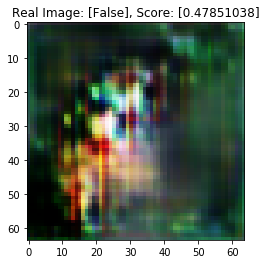

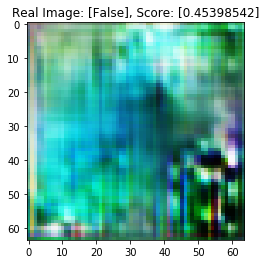

In [62]:
#Show samples
latent_vectors = np.random.normal(0.0, 1.0, [16, 64])
fake_images = load_generator.predict(latent_vectors)
disc_pred = discriminator.predict(fake_images)


for i in range(5):
    result = disc_pred[i]
    plt.figure(i)
    plt.title('Real Image: {}, Score: {}'.format(result > 0.5, result))
    plt.imshow(fake_images[i])

plt.show()

## visualizing used parameters

In [43]:
print('Real Labels: ', real_labels[:5])
print('Fake Labels: ', fake_labels[:5])

Real Labels:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Fake Labels:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [63]:
image_indices

array([6202, 5281, 3739, 7805, 5815, 2374, 5080, 2271,  785,  748, 6654,
       2055, 7665,  835, 7079, 5276, 7943, 4161, 2455, 4173, 2973, 1527,
       6263, 2776, 7860, 3990,  478,  547, 5568, 2339,  782, 8153, 4822,
       6818, 1080, 6021,  678, 6243, 2843, 6667, 5103, 6232, 2727, 7337,
       1323, 3015,  612, 1114, 6101, 2179, 6932, 5290,  288,  813, 1255,
       4240, 4302, 2098, 7896, 2192, 7382, 1989, 4584,  221])

In [64]:
real_images.shape

(64, 64, 64, 3)

In [65]:
latent_vectors.shape
print(latent_vectors[0])

[ 0.1664274  -1.04874754  0.37184498  0.96697561  1.19482302 -0.86439091
 -0.89309868 -0.69192876  0.87114745 -0.50940281  1.5109696  -0.7699378
 -0.70745001  1.36986554  1.18177033 -0.10590976 -0.24826044 -0.27625895
  1.15055402 -0.14229355 -0.36276467 -1.37854892 -1.34596822  1.01483329
  0.52742456 -0.41861539  1.91892838 -0.71830108 -0.49693043 -0.33660725
 -0.73540777  2.86373953 -0.78500431 -0.06191301  0.27917988 -0.00710537
  0.56478091  0.52357232  0.64176001 -0.86636707 -1.59510278  0.94571049
  0.94403511 -0.45441083 -0.29910578  1.11947593  0.14034832 -0.12155515
  1.50111615 -0.23562706  1.81597568 -1.69427279  0.65468413  0.97028034
 -0.26898196  1.27970534 -0.10415815  0.1096086  -0.69546313 -2.06309228
  0.22680468 -1.20986245  0.71597552 -1.3269903 ]


In [66]:
temp = discriminator(fake_image)

In [67]:
temp

<tf.Tensor 'model_2_4/dense_2/BiasAdd:0' shape=(None, 1) dtype=float32>